<a href="https://colab.research.google.com/github/Hyunsooooo/Pytorch-/blob/main/04_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%9A%8C%EA%B7%80_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소프트맥스 회귀(Softmax Regression)

## 4.1 원-핫 인코딩

이번 챕터에서는 범주형 데이터를 처리할 때 레이블을 표현하는 방법인 원-핫 인코딩에 대해서 배워봅시다

### 4.1.1 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩은 서택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소에는 0의 값을 가지도록 하는 표현 방법.
예를 들어, 강아지 고양이 냉장고 3개의 선택지가 있다고 가정

원-핫 인코딩을 하기 위해서는 선택지에 순차적으로 정수 인덱스를 부여한다. 임의로 강아지는 0번 , 고양이 1번, 냉장고 2 번 부여했다고 하면 각 선택지에 대해 원-핫 인코딩이 된 벡터는 다음과 같다.

강아지 = [1,0,0]

고양이 = [0,1,0]

냉장공 = [0,0,1]

총 선택지는 3개였으므로 위 벡터들은 전부 3차원의 벡터가 되었다. 그리고 각 선택지의 벡터들을 보면 해당 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가진다. 예를들어 고양이는 1번 인덱스였으므로, 원-핫 인코딩에서 얻은 벡터에서 1번 인덱스에만 1의 값을 가지는 것을 볼 수 있다.

이와 같이 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터 라고 한다.

### 4.1.2. 원-핫 벡터의 무작위성

꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 방법이다.

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요하다. 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 것이다. 예를 들어 분류해야할 레이블이 {red,green,glue}와 같이 3개라면 각각 0,1,2 로 레이블을 한다. 또는 분류해야 할 클래스가 4개이고 인덱스를 숫자 0부터 시작하고 싶다면 {baby,child,adolescent,adult} 라면 1,2,3,4로 레이블을 해볼 수 있다. 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현했다고 할 수 있다.

Banana , Tomato, Apple 이라는 3개의 클래스가 존재하는 문제가 있다고 해보자. 레이블은 정수 인코딩을 사용하여 각각 1,2,3 을 부여하였다. 손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있다.
아래의 식은 MSE인데 y헷은 예측값을 의미한다.

$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$

직관적인 오차 크기 비교를 위해 제곱 오차로만 판단해보면

$(2-1)^{2} = 1$

실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.

$(3-1)^{2} = 4$

즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없습니다. 더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해봅시다.

{Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10}

이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있습니다. 이는 사용자가 부여하고자 했던 정보가 아닙니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다. 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당됩니다. 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때 각 클래스 간의 제곱 오차가 균등함을 보여준다.

$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$

$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다.
원-핫 벡터는 일처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있다.
이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로도 언급되기도 한다.

## 4.2 소프트맥스 회귀 (softmax regression) 이해하기

앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류(binary classification)을 풀어봤습니다. 이번 챕터에서는 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 (Multi-class classification)을 실습해봅시다.

### 4.2.1 다중 클래스 분류

이진 분류가 두 개의 답중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류 라고 한다. 아래의 문제는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이 라는 4개의 특성(feature)로 부터 setosa, versicolor, virginica 라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제다.

|SepalLengthCm$(x_1)$|SepalWidthCm$(x_2)$|PetalLengthCm$(x_3)$|PetalWidthCm$(x_4)$|Species$(y)$|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습

이번 챕터 설명에서 입력은 x 가중치는 W, 편향은 B, 출력은  $\hat{Y} 로 각 변수는 벡터 또는 행렬로 가정한다.

*   $\hat{Y}$은 예측값이라는 의미를 가지고 있으므로 가설식에서 $H(X)$ 대신 사용되기도 합니다.




1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만든다. 예를 들어 스팸 메일 분류기를 ㄹ지스틱 회귀로 구현하였을 때, 출력이 0.75 라면 이는 이메일이 스팸일 확률이 75프로 라는 의미가 된다. 반대로 스팸 메일이 아닐 확률은 0.25가 된다. 이 두 확률의 총 합은 1이다

![대체 텍스트](https://wikidocs.net/images/page/59427/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

가설 : $H(X) = sigmoid(WX + B)$

2) 소프트맥스 회귀

소프트맥스 회귀는 확률의 총합이 1이 되는 아이디어를 다중 클래스 분류 문제에 적용한다. 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당한다. 이 때 총 확률의 합은 1이 되어야 한다. 이렇게 되면 각 선택지가 정답일 확률로 표현된다.

![대체 텍스트](https://wikidocs.net/images/page/59427/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80.PNG)

결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 한다. 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ? 를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여준다. 뒤에서 배우지만이 함수를 softmax 함수라고 부른다.


가설 : $H(X) = softmax(WX + B)$

### 4.2.2 소프트맥스 함수

소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k 라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해본다.

1) 소프트맥스 함수의 이해

k차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률을 pi 라고 나타낸다고 했을 때, 소프트맥스 함수는 pi를 다음과 같이 정의한다.

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해보자. 위에서 풀어야하는 문제의 경우 k=3 이므로 3차원 벡터  $z=[z_{1}\ z_{2}\ z_{3}]$ 의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 return 한다.

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

p1,p2,p3 각각은 1번 클래스, 2번 클래스, 3번 클래스가 정답일 확률을 나타내며 각각  0과 1 사이의 값으로 총 합은 1이 된다. 여기서 분류하고자 하는 3개의 클래스는 virginica, setosa, versicolor 이므로 이는 결국 각 확률을 나타내는 값을 의미한다. 여기서는 i 가 1 일 때는 virginica, 2 = setosa, 3= versicolor 일 확률이라고 지정하였다 치자. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이다. 이에 따라 식을 문제에 맞게 다시 쓰면

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$

분류하고자 하는 클래스가 k개 일때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1 사이의 값을 값을 변경하여 다시 k차원의 벡터를 리턴한다는 내용을 식으로 기재하였을 뿐이다.




2) 그림을 통한 이해

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax1_final_final.PNG)

위의 그림에 점차 살을 붙여보자 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정하자. 즉 배치 크기가 1이다.

위의 그림에는 두 가지 질문이 있다. 첫 번째 질문은 소프트맥스 함수의 입력에 대한 질문이다. 하나의 샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로, 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 한다. 위의 그림에서는 함수의 입력으로 사용되는 3차원 벡터를 z로 표현했다.


![대체 텍스트](https://wikidocs.net/images/page/35476/softmaxbetween1and2.PNG)

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단하다. 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행한다. 위의 그림에서 화살표는 총 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경된다.

두번째 질문은 오차 계산 방법에 대한 질문이다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1 사이의 값을 가진다. 이 각각은 특정 클래스가 정답일 확률을 나타낸다. 여기서는 첫 번째 원소인 p1 은 virginica가 정답일 확률, 두번째 원소인 p2는 setosa가 정답일 확률, 세 번째 원소인 p3는 versicolor가 정답일 확률이다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 하는데, 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현한다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax2_final.PNG)

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 p1가 virginica가 정답일 확률, 두번째 원소 p2가 setosa가 정답일 확률, 세 번째 원소 p3가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1,2,3 이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여준다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax4.PNG)

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa 라면 setosa의 원-핫 벡터는 [0 1 0] 이 된다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우이다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 다시 설명

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax5.PNG)

이제 앞서 배운 선형 회귀나 로지스틱 회귀와 같이 오차로부터 가중치를 업데이트 한다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax6_final.PNG)

편향 또한 업데이트 되는 매개 변수이다. 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해보자. 입력을 특성(feature) 수만큼 차원을 가진 입력 벡터 x라고 하고, 가중치 행렬을 W 편향을 b 라고 했을때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같다.


![대체 텍스트](https://wikidocs.net/images/page/59427/%EA%B0%80%EC%84%A4.PNG)

여기서 f는 특성의 수이며, c 는 클래스의 개수에 해당된다.

### 4.2.3 붓꽃 품종 분류하기 행렬 연산으로 이해하기

위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해보자. 우선 위의 예제의 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로, 5x4 행렬 X로 정의한다.

$X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)$

  편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현

  $X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)$

  이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬$\hat{Y}$의 열의 개수는 3개여야 한다. 그리고 각 행은 X의 각 행의 예측값이므로 행의 크기는 동일해야 한다. 결과적으로 행렬 $\hat{Y}$의 크기는 5X3 이다.

  $\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$

크기 5x3 Y헷 는 크기 5x4 입력 행렬 X 과 가중치 행렬 W의 곱으로 얻어지는 행렬이므로 가중치 행렬 W 의 크기는 추정을 통해 4x3 행렬임을 알 수 있다.

$W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)$

편향 행렬 B는 예측값 행렬 Y헷 과 크기가 동일해야 하므로 5X3의 크기를 가진다.

$B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)$

  결과적으로 가설식은 다음과 같다.

  
$\hat{Y} = softmax(XW + B)$



$\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$=$softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$

### 4.2.4 비용 함수 (cost fuction)

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠다.

1) 크로스 엔트로피 함수

아래에서 y는 실제값을 나타내며, k는 클래스의 개수로 정의한다. yj는 실제값 원-핫 벡터의 j번째 index를 의미하며, pj는 샘플 데이터가 j번째 클래스일 확률을 나타낸다. 표기에 따라서 $\hat{y}_{j}$ 로 표현하기도 한다.

$cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

이 함수과 왜 비용함 수로 적합한가? c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면 , $p_{c}=1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 된다. 이를 식에 대입해보면  $-1 log(1) = 0$이 되기 때문에 결과적으로 y헷 가 y를 정확하게 예측한 경우의 크로스 엔트로피 값은 0이 된다. $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$이 값을 최소화하는  방향으로 학습해야한다는 뜻임

이제 이를 n개의 전체 데이터에 대한 평균을 구한다고 한다면 최종 비용 함수는 다음과 같다.


$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식이다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해보자.

$cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$

위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여준다. 위의 식에서 $y$를 $y_1$, $y$−1을 $y_2$로 치환하고 $H(X)$를 $p_1$, 1−$H(X)$를 $p_2$로 치환해보자.
결과적으로 아래의 식이 나온다.

$-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))$

이 식은 아래와 같이 표현할 수 있다.

$-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})$

소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경한다.

$-(\sum_{i=1}^{k}y_{i}\ log\ p_{i})$

위의 식은 결과적으로 소프트맥스 회귀의 식과 동일하다.
역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, y1 , y2 를 각각 y와 1-y로 바꾸고, p1,p2를 각각 H(x) 와 1-H(x)로 치환하면 된다.

정리하면 소프트맥스 함수의 최종 비용 함수에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같다.


$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$

## 4.3 소프트맥스 회귀의 비용 함수 구현하기

이번 챕터에서는 소프트맥스 회귀를 구현해보자

앞으로의 모든 실습은 아래의 과정이 이미 진행되었다고 가정한다.

In [ ]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

### 4.3.1 파이토치로 소프트맥스의 비용 함수 구현하기(로우-레벨)

소프트맥스 회귀를 구현함에 있어 우선 소프트맥스 함수의 비용 함수를 로우-레벨로 구현해보자. 3개의 원소를 가진 벡터 텐서를 정의하고, 이 텐서를 통해 소프트맥스 함수를 이해해보겠다.



In [ ]:
z = torch.FloatTensor( [1,2,3])


In [ ]:
# 이 텐서를 소프트맥스의 함수의 입력으로 사용하고, 그 결과를 확인해보자

hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
# 3개의 원소의 값이 0과 1 사이를 가지는 벡터로 변환됐다. 이원소들의 값의 합이 1인가?
hypothesis.sum()

tensor(1.)

In [ ]:
# 총 원소의 값은 1이다. 이번에는 비용 함수를 직접 구현해본다. 임의의 3x5 행렬을 만든다.

z = torch.rand(3,5, requires_grad=True)

In [ ]:
# 이제 이 텐서에 대해 소프트맥스 함수를 적용한다. 단, 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로
# 두 번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미로 dim = 1  을 써준다.

hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


이제 각 행의 원소들의 합은 1이 되는 텐서로 변환되었다. 소프트맥스 함수의 출력값은 결국 예측값이다. 즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과이다.

이제 각 샘프에 대해 임의의 레이블을 만든다.

In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
# 각 레이블에 대해 원-핫 인코딩을 수행한다.

# 모든 원소가 0을 가진 3x5 텐서 생성

y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1,y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

위의 연산에서 어떻게 원-핫 인코딩이 수행되었는가? 우선 , torch.zeros_like(hypothesis)를 통해 모든 원소가 0이면서 hypothesis의 모양을 따르는 3x5 행렬을 만든다. 그리고 이 텐서는 y_one_hot에 할당됐다.

두 번째 줄, y.unsqueeze(1) 를 하면 (3,)의 크기를 가졌던 y 텐서는 (3x1) 텐서가 된다. 즉 y.unsqueeze(1)의 결과는 다음과 같다.

In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


그리고 scatter의 첫 번째 인자로 dim=1 에 대해 수행하라고 알려주고, 세 번째 인자에 숫자 1을 넣어줘서 두 번째 인자인 y_unsqueeze(1) 이 알려주는 위치에 숫자 1을 넣도록 한다. 연산 뒤에 _를 붙이면 덮어쓰기 연산임을 배운 바 있다.

In [ ]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


이제 비용 함수 연산을 위한 재료들을 전부 손질했다. 소프트맥스 회귀의 비용 함수는 다음과 같았다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

마이너스 부호를 뒤로 빼면 다음 식과도 동일하다.

$cost(W) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ * (-log(p_{j}^{(i)}))$

이를 코드로 구현하면 아래와 같다.

$\sum_{j=1}^{k}$는 sum(dim=1)으로 구현하고, $\frac{1}{n} \sum_{i=1}^{n}$는 mean()으로 구현한다.

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

In [ ]:
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 4.3.2 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

이제 소프트맥스의 비용 함수를 좀 더 하이-레벨로 구현하는 방법에 대해 알아보자



1) F.softmax() + torch.log() = F.log_softmax()(

  앞서 소프트맥스 함수의 결과에 로그를 씌울 때는 다음과 같이 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용했다.

In [ ]:
# Low level

torch.log(F.softmax(z,dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward>)

In [ ]:
# High level

F.log_softmax(z, dim= 1)  # 두 개의 함수를 결합한 F.log_softmax() 라는 도구를 제공한다.

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward>)

2) F.log_softmax() + F.nll_loss() = F.cross_entropy()

앞서 로우- 레벨로 구현한 비용 함수는 다음과 같았다.



In [ ]:
# low level
# 첫 번째 수식

(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
# F.log_softmax() 로 대체할 수 있다.

# 두 번째 수식

(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

이를 더 간단하게 하면 다음과 같다. F.nll_loss()를 사용 할 때는 바로 실제값을 인자로 사용한다. *원-핫 벡터를 넣을 필요가 없다!

In [ ]:
# High level

# 세 번째 수식

F.nll_loss(F.log_softmax(z, dim=1 ) ,y)

tensor(1.4689, grad_fn=<NllLossBackward>)

여기서 nll 이란 Negative Log Likelihood의 약자이다. 위에서 nll_loss 는 F.log_softmax() 를 수행한 후에 남은 수식들을 수행한다. 이를 더 간단하게 하면 다음과 같이 사용할 수도 있다. F.cross_entropy() 는 F.log_softmax()와 F.nll_loss()를 포함하고 있다.

In [ ]:
# 네 번째 수식

F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward>)

F.cross_entorpy 는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억해야 구현 시 혼동하지 않는다.

## 4.4 소프트맥스 회귀 구현하기

소프트맥스 회귀를 로우-레벨과 F.cross_entropy를 사용해서 구현해보겠다. 앞으로의 모든 실습은 아래의 과정이 이미 진행되었다고 가정한다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# x_train 의 각 샘플을 4개의 특성을 가지고 있고, 8개의 샘플이 있다.
# y_train은 각 샘플에 대한 레이블인데, 여기서는 0,1,2 의 값을 가지는 걸 보아 3개의 클래스가 존재한다.

### 4.4.1 소프트맥스 회귀 구현하기 (로우-레벨)

In [ ]:
# x_train과 y_train의 크기를 확인

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
# x_train의 크기는 8x4 이며, y_train의 크기는 8x1 이다. 최종 사용할 레이블은 y_train에서 원-핫 인코딩을 한결과이므로
# 클래스의 개수가 3개이므로, y_train에 원-핫 인코딩을 한 결과는 8x3 의 개수를 가져야 한다.

y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
# y_train에서 원-핫 인코딩을 한 결과인 y_one_hot의 크기는 8x3 이다. 즉, W행렬의 크기는 4x3이어야 한다.
# W와 b를 선언하고 , 옵티마이저는 SGD를 사용한다. lr = 0.1

# 모델 초기화

W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정

optimizer = optim.SGD([W,b], lr = 0.1)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### 4.4.2 소프트맥스 회귀 구현하기(하이-레벨)

이제는 F.cross_entropy()를 사용하여 비용 함수를 구현해보겠다. 주의할 점은 F.cross_entropy() 는 그 자체로 소프트맥스함수를 포함하고 있으므로 가설에서 소프트맥스를 사용할 필요가 없다.

위와 동일한 x_train, y_train을 사용.



In [ ]:
# 모델 초기화

W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정

optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs+1):
  # Cost
  z= x_train.matmul(W)+b
  cost = F.cross_entropy(z, y_train)

  # cost 로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
          ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### 4.4.3 소프트맥스 회귀 nn.Module로 구현하기



In [ ]:
# 모델을 선언 및 초기화. 4개의 특성 3개의 클래스 분류 input_dim = 4, output_dim =3
model = nn.Linear(4,3)

In [ ]:
# optimizer 설정

optimizer=optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs+1):

  # H(x)
  prediction = model(x_train)

  # cost
  cost = F.cross_entropy(prediction,y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609259
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241922


### 4.4.4 소프트맥스 회귀 클래스로 구현하기

In [ ]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3) # ouput = 3

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정

optimizer = optim.SGD(model.parameters(),lr= 0.1)


nb_epochs = 1000

for epoch in range(nb_epochs+1):

  # H(x)
  prediction = model(x_train)

  # cost
  cost = F.cross_entropy(prediction,y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.845720
Epoch  100/1000 Cost: 0.647150
Epoch  200/1000 Cost: 0.568868
Epoch  300/1000 Cost: 0.515699
Epoch  400/1000 Cost: 0.471727
Epoch  500/1000 Cost: 0.432486
Epoch  600/1000 Cost: 0.395879
Epoch  700/1000 Cost: 0.360507
Epoch  800/1000 Cost: 0.325227
Epoch  900/1000 Cost: 0.289217
Epoch 1000/1000 Cost: 0.254086


## 4.5 소프트맥스 회귀로 MNIST 데이터 분류하기

### 4.5.1 MNIST 데이터 이해하기

![대체 텍스트](https://wikidocs.net/images/page/60324/mnist.png)


MNIST 는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다. 이 데이터는 과거에 우체국에서 편지의 우편번호를 인식하기 위해서 만들어진 훈련 데이터이다. 총 60,000개의 훈련데이터와 레이블, 총 10000개의 테스트 데이터와 레이블이 있다. 이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제다.

MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제이다. 예를 들어 숫자 5의 이미지가 입력으로 들어오면 이게 숫자 5다 라는 것을 맞춰야 한다. 이 문제는 사람에게 간단하지만 기계에게는 그렇지 않다.

우선 MNIST 문제를 더 자세히 보면 각각의 이미지는 아래와 같이 28x28 픽세르이 이미지다.

![대체 텍스트](https://wikidocs.net/images/page/60324/mnist_SVbcYYG.png)

이 문제를 풀기 위해 여기서는 28x28 픽셀 = 784 픽셀이므로 각 이미지를 총 784 개의 원소를 가진 벡터로 만들어 줄거다. 이렇게 되면 총 784 개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많다


![대체 텍스트](https://wikidocs.net/images/page/60324/%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C.png)

784 차원의 벡터로 만드는 코드를 미리보기로 보면 다음과 같다.

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
# MNIST dataset
# 자세한 건 후술

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
X,y = mnist_train[0]
print('X size = ',X.size())
print('입력 이미지를 [batch_size X 784]의 크기로 reshape = ',X.view(-1, 28*28).size())

X size =  torch.Size([1, 28, 28])
입력 이미지를 [batch_size X 784]의 크기로 reshape =  torch.Size([1, 784])


### 4.5.2 토치비젼 소개하기

본격적인 실습에 앞서 토치비젼이라는 도구에 대해 설명해보자. torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지이다. 아래의 링크는 torchvision 에 어떤 데이터셋들, 어떤 모델들 그리고 전처리 방법들 (datasets, models, transfomrs) 을 제공하고 있는지 보여준다

링크 : https://pytorch.org/docs/stable/torchvision/index.html

자연어 처리를 위해서는 torchtext 라는 패키지가 있다.

### 4.5.3 분류기 구현을 위한 사전 설정



In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU 사용 가능하면 True, 아니라면 False 를 리턴
device = torch.device('cuda' if USE_CUDA else 'cpu') # GPU 사용 가능하면 사용하고 아니면 cpu 사용

print('다음 기기로 학습합니다',device)

다음 기기로 학습합니다 cuda


In [ ]:
# for reproducibility

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
# 하이퍼파라미터를 변수로 둔다.

# hyperparameters
training_epochs = 15
batch_size = 100

### 4.5.4 MNIST 분류기 구현하기

torch.vision.datsets.dsets.MNIST 를 사용하여 MNIST 데이터셋을 불러올 수 있다.

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

첫 번째 인자 root 는 MNIST 데이터를 다운로드 받을 경로이다. 

두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받고 False를 주면 테스트 데이터를 리턴받는다.

 세번째 인자 trasnform 은 현재 데이터를 파이토치텐서로 변환해준다. 
 
 네번째 인자 download 는 해당경로에 MNIST 
데이터가 없다면 다운로드 받겠다는 의미이다.

이렇게 데이터를 다운로드했으면, 앞서 미니배치와 데이터 로드 챕터에서 학습했던 데이터로더를 사용한다.

In [ ]:
#dataset loader

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size, # 배치 크기는 100
                         shuffle = True,
                         drop_last = True)

이 때 DataLoader에는 4개의 인자가 있다.

1. dataset : 로드할 대상을 의미
2. batch_size : 배치 크기
3. shuffle : 매 에포크마다 미니 배치를 셔플할 것인지
4. drop_last : 마지막 배치를 버릴 것인지

drop_last를 하는 이유를 이해하기 위해 1000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해보자, 1,000 을 128로 나누면 7개가 나오고 104개가 남는다. 이때 104개를 마지막 배치로 한다고 했을 때 128개를 충족하지 못했으므로 그냥 104개를 버릴 수도 있다. 이때 마지막 배치를 버리려면 True로 설정해주면 된다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대평가되는 현상을 막아준다

이제 모델을 설계한다. input_dim 은 784 이고, output_dim 은 10이다.



In [ ]:
# MNIST data image of shape 28*28 = 784

linear = nn.Linear(784, 10, bias =True).to(device)

to() 함수는 연산을 어디서 수행할지를 정한다. to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다. CPU를 사용하는 경우에는 필요가 없지만 GPU를 사용하려면 to('cuda')를 해줄 필요가 있다. 아무것도 지정하지 않는 경우에는 CPU 연산이라고 보면 된다.

bias 는 편향 b 를 사용할 것인지를 나타낸다. 기본값은 True 이다.

In [ ]:
# 비용 함수와 optimizer 정의

criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수 포함
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy() 를 사용했으나, 여기서는 torch.nn.Cross.EntropyLoss()를 사용하고 있다. 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있다.

In [ ]:
for epoch in range(training_epochs): # 앞서 training_epochs 의 값은 15로 지정했었다.
    avg_cost = 0
    total_batch = len(data_loader)

    for X,Y in data_loader:
      # 배치 크기가 100이므로 아래의 연산에서 X 는 (100,784)의 텐서가 된다.
      X = X.view(-1, 28*28).to(device)
      # 레이블은 원-핫 인코딩이 된 상태가 아니라 0~9 사이의 정수
      Y = Y.to(device)

      optimizer.zero_grad()
      hypothesis = linear(X)
      cost = criterion(hypothesis,Y)
      cost.backward()
      optimizer.step()

      avg_cost +=cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')


Epoch: 0001 cost = 0.288894027
Epoch: 0002 cost = 0.285807252
Epoch: 0003 cost = 0.282866865
Epoch: 0004 cost = 0.280836403
Epoch: 0005 cost = 0.278653204
Epoch: 0006 cost = 0.276752770
Epoch: 0007 cost = 0.275104433
Epoch: 0008 cost = 0.273745686
Epoch: 0009 cost = 0.272228450
Epoch: 0010 cost = 0.271123946
Epoch: 0011 cost = 0.269739419
Epoch: 0012 cost = 0.268750042
Epoch: 0013 cost = 0.267728657
Epoch: 0014 cost = 0.266432613
Epoch: 0015 cost = 0.265821218
Learning finished


Accuracy: 0.8833000063896179
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


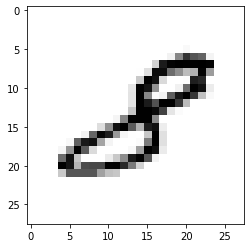

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.

with torch.no_grad(): # torch.no_grad() 를 하면 gradient 계산을 하지 않는다.
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다

  r = random.randint(0, len(mnist_test)-1)
  X_single_data= mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation = 'nearest')
  plt.show()